In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import matt_acquire as acquire
import nick_prepare as prepare
import nick_explore as explore

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

# Superstore - Product Recommendations
### Nicholas Dougherty & Matthew Luna, April 22, 2022


# Executive Summary 

## Project Goals
### - Provide insight and guidance for current products offered

## Project Description
### - Draw conclussions from superstore data analysis
### - Make sure recommendations are supported by visuals and statistic analysis

## Data Acquisition and Preparation

In [2]:
df = acquire.get_superstore_data()
df.shape

Using cached csv


(1734, 23)

include a little information on where data came from

provide structure
title, agenda- topics, 
ex summary - just one slide for recap that would be it, 
recommendations - slide with recommendation and reasoning/visualization supporting, 
conclusion - wraps up and tells audience the takeaways

## Prepare Process
### - Renaming columns so it's more user friendly
### - Reset the index to datetime
### - No missing values were present
### - Created a 'month' column from the datetime index
### - Created a 'year' column from the datetime index
### - Created a 'days_bw_shipment' column by subtracting the difference from ship_date and order_date
### - Created a 'profit_per_product' column by dividing the profit column by quantity
### - Created a 'sales_per_product' column by dividing the sales column by quantity
### - Created a 'brands' column by grouping together all products of a similary brand name
### - Data was not split for this project since there was no modeling done


In [3]:
df = prepare.prepare_superstore(df)
df.shape

Using cached CSV


(1734, 25)

# Data Context
### - Dataset is comprised of 1734 rows and 21 columns
### - Each row is a product order
### - Every order varies as far as what products are being ordered and the quantity of products ordered
### - Three product categories are Office Supplies, Furniture, and Technology
### - There were no rows dropped from the original dataset

# Exploration


In [4]:
obj_cols = ['segment', 'category', 'sub_category', 'region_name']
for col in obj_cols:
    print(col.upper())
    print('Count:')
    print(df[col].value_counts())
    print('\n')
    print('Proportions:')
    print(df[col].value_counts(normalize=True, dropna=False))
    print('--------------------------')
    print('\n')

SEGMENT
Count:
Consumer       954
Corporate      478
Home Office    302
Name: segment, dtype: int64


Proportions:
Consumer       0.550173
Corporate      0.275663
Home Office    0.174164
Name: segment, dtype: float64
--------------------------


CATEGORY
Count:
Office Supplies    1055
Furniture           360
Technology          319
Name: category, dtype: int64


Proportions:
Office Supplies    0.608420
Furniture          0.207612
Technology         0.183968
Name: category, dtype: float64
--------------------------


SUB_CATEGORY
Count:
Binders        263
Paper          224
Furnishings    168
Storage        162
Phones         157
Art            149
Accessories    131
Chairs          95
Appliances      71
Labels          67
Tables          62
Envelopes       48
Fasteners       43
Bookcases       35
Supplies        28
Machines        21
Copiers         10
Name: sub_category, dtype: int64


Proportions:
Binders        0.151672
Paper          0.129181
Furnishings    0.096886
Storage        

In [5]:
explore.create_top_bottom_dfs(df)

(                     unnamed:_0       product_id customer_id        order_id  \
 order_date_anew                                                                
 2015-12-19 01:00:00         755  TEC-AC-10002049    JG-15160  CA-2015-157084   
 2017-09-02 02:00:00        1017  TEC-AC-10004666    BE-11335  CA-2017-137596   
 2015-07-31 00:00:00        1491  TEC-AC-10003033    RH-19495  CA-2015-124891   
 2017-01-22 00:00:00         409  TEC-CO-10003236    AD-10180  CA-2017-127432   
 2014-09-21 01:00:00         359  TEC-CO-10002313    JG-15115  US-2014-135972   
 2015-03-19 02:00:00         760  TEC-CO-10001766    FH-14365  CA-2015-111829   
 2014-11-04 01:00:00        1268  TEC-MA-10002927    NM-18445  CA-2014-164973   
 2016-03-01 03:00:00        1534  TEC-MA-10003979    KD-16270  US-2016-143819   
 2017-01-07 00:00:00        1028  TEC-MA-10000822    BW-11110  CA-2017-159366   
 2017-09-02 01:00:00        1016  TEC-PH-10001494    BE-11335  CA-2017-137596   
 2014-06-21 01:00:00        

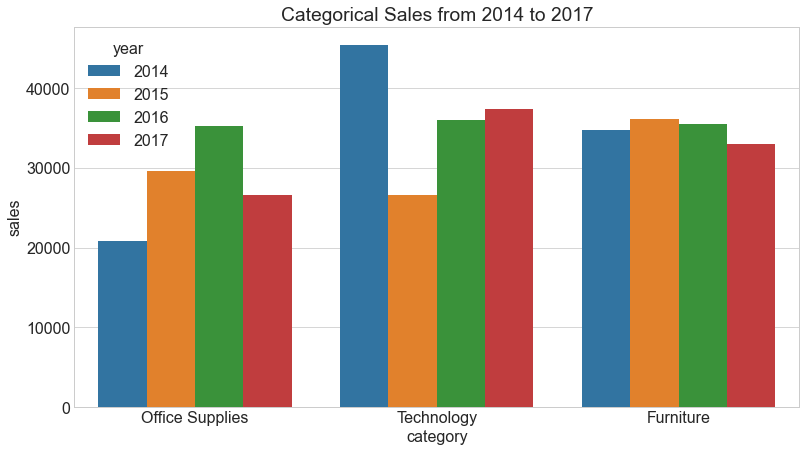

In [6]:
sns.barplot( data = df, x = 'category', y = 'sales', hue = 'year', ci = None, estimator = np.sum)
plt.title('Categorical Sales from 2014 to 2017')
None

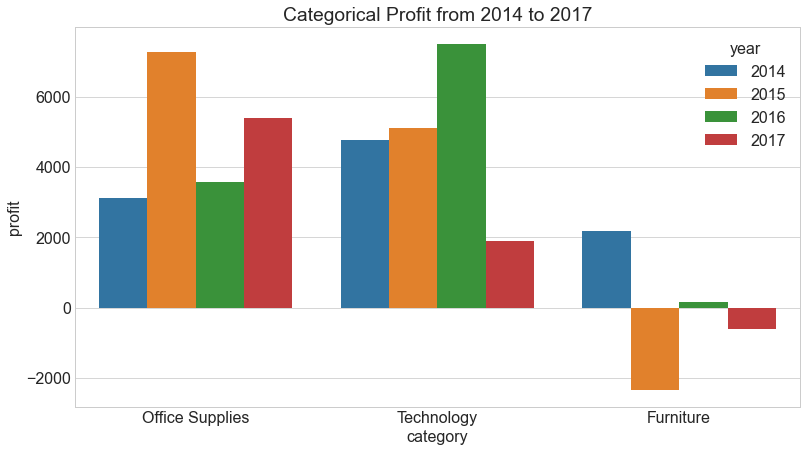

In [7]:
sns.barplot( data = df, x = 'category', y = 'profit', hue = 'year', ci = None, estimator = np.sum)
plt.title('Categorical Profit from 2014 to 2017')
None

### We can see from the data that furniture sales have been steady over the past few years, but the profit has varied drastically
 
### On the flip side of that, our technological sales have varied over the past few years but the profit has had an positive return
 
#### - Based on what we see, Office supplies has a consistent ROI, technology has shown an upward climb, furniture has had questionable ROI with two negative years

# Question 1
### - Which Product line should we expand?

# Question 2
### - Is there a product category that is particularly profitable for us?

# Question 3
### - Does one or another stand out in terms of sales volume?

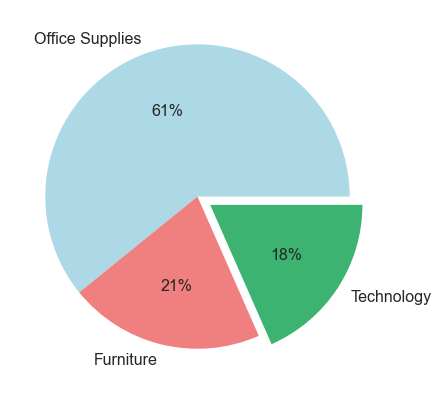

In [8]:
# plotting data on chart
data = [1055, 360, 319]
keys = ['Office Supplies', 'Furniture', 'Technology']
# declaring exploding pie
explode = [0, 0, 0.1,]


plt.pie(data , labels = keys, colors=['lightblue', 'lightcoral', 'mediumseagreen'], autopct='%.0f%%', explode = explode)
plt.show()

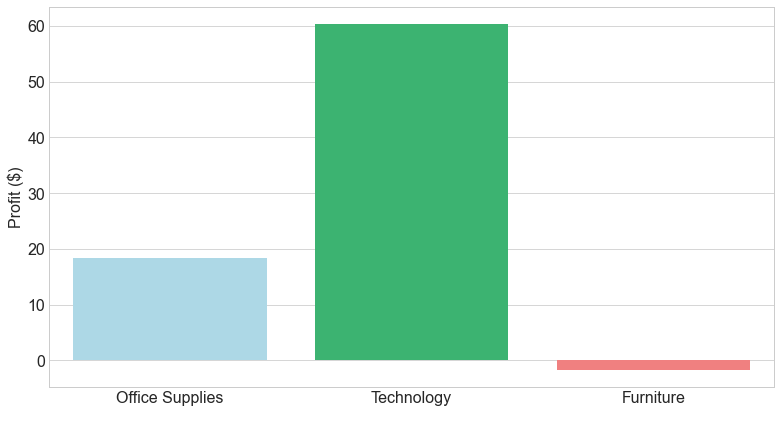

In [9]:
sns.barplot( data = df, x = 'category', y = 'profit', ci = None, estimator = np.mean, palette = ['lightblue', 'mediumseagreen', 'lightcoral'], saturation = 1)
plt.xlabel(' ')
plt.ylabel('Profit ($)')
None

## Hypothesis Testing - Is the Furniture category worth keeping around?

### - H0: Mean of furniture profit = Mean profit of all categories
### - Ha: Mean of furniture profit < Mean profit of all categories

In [10]:
alpha = .05

furniture_sample = df[df.category == 'Furniture'].profit
overall_mean = df.profit.mean()

t, p = stats.ttest_1samp(furniture_sample, overall_mean)

print(t, p/2, alpha)

-2.73786337335737 0.0032459944267065276 0.05


In [11]:
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t > 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

We reject the Null Hypothesis


## Hypothesis Testing - Is the Technology category worth keeping around?
### - H0: Mean of Technology profit = Mean profit of all categories
### - Ha: Mean of Technology profit > Mean profit of all categories

In [12]:
alpha = .05

furniture_sample = df[df.category == 'Technology'].profit
overall_mean = df.profit.mean()

t, p = stats.ttest_1samp(furniture_sample, overall_mean)

print(t, p/2, alpha)

1.9414310928961964 0.02654456320098377 0.05


In [13]:
if p/2 > alpha:
    print("We fail to reject the Null Hypothesis")
elif t < 0:
    print("We fail to reject the Null Hypothesis")
else:
    print("We reject the Null Hypothesis")

We reject the Null Hypothesis


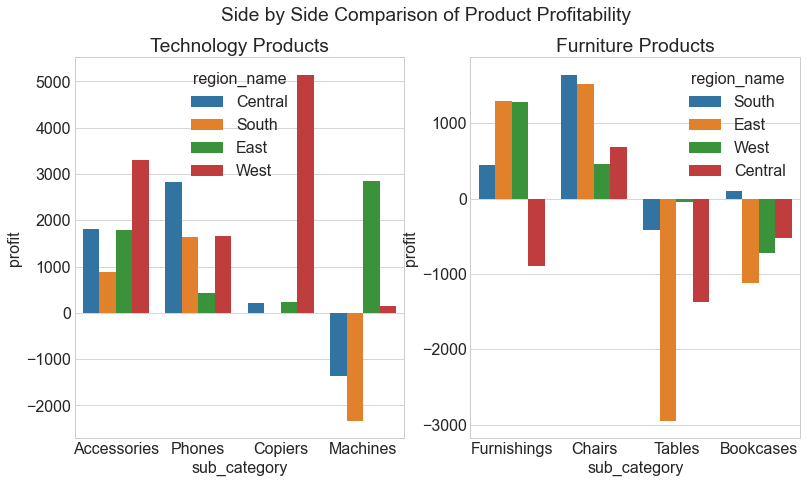

In [14]:
explore.products_furn_and_tech(df)

In [15]:
top_product_lines = explore.top_product_lines(df)

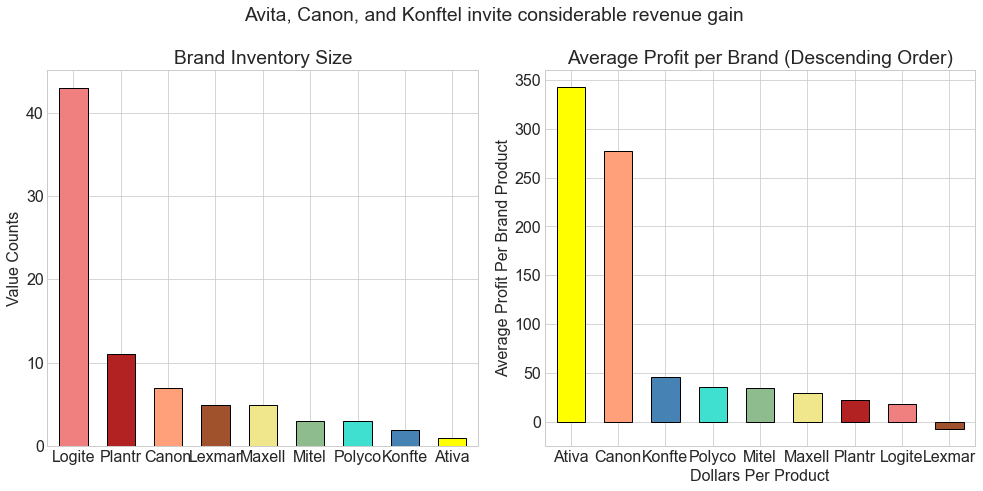

In [16]:
explore.show_top_brands(top_product_lines)

sub_category
Appliances    8.576228
Envelopes     8.453231
Paper         6.648605
Storage       5.900126
Labels        5.374437
Binders       3.352888
Art           2.146061
Fasteners     1.121651
Supplies     -6.367511
Name: profit_per_product, dtype: float64


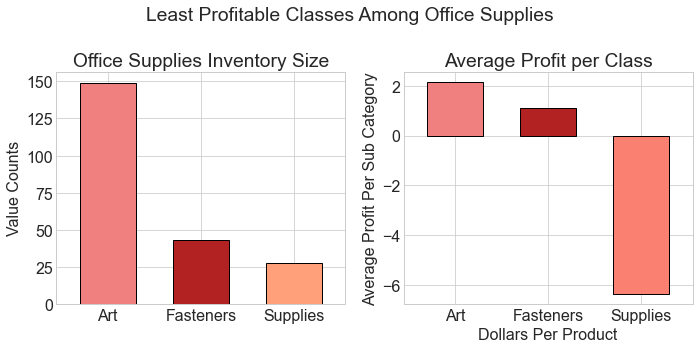

In [17]:
explore.show_office_inventory_bad_cats(df)

## Takeaways:
### Q1 - The Furniture category shows to be non profitable on average over the last 4 years
    - Furniture profit on average is less than the overall profit average
### Q2 - The Technology category shows to be the most profitable on average over the last 4 years
    - Technology profit on average is greater tahn the overall profit average
### Q3 - Most product sales come from the Office Supplies Category


# Question 4
### - Does this vary by region?

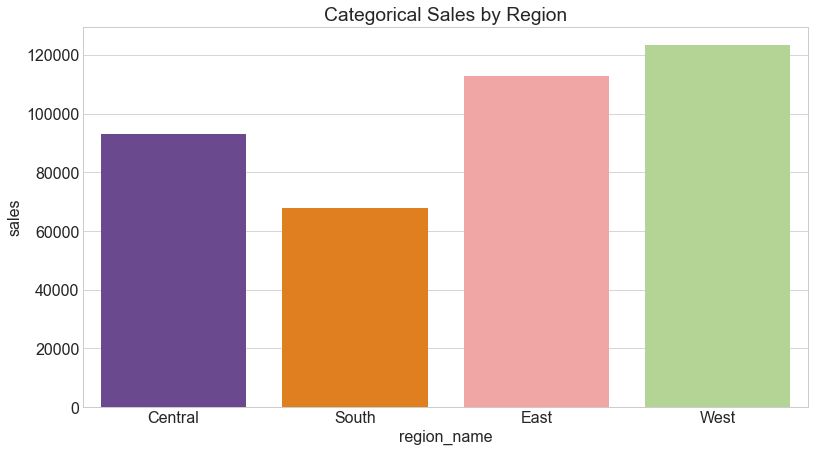

In [42]:
sns.barplot( data = df, x = 'region_name', y = 'sales', ci = None, estimator = np.sum, palette = 'Paired_r')
plt.title('Categorical Sales by Region')
None

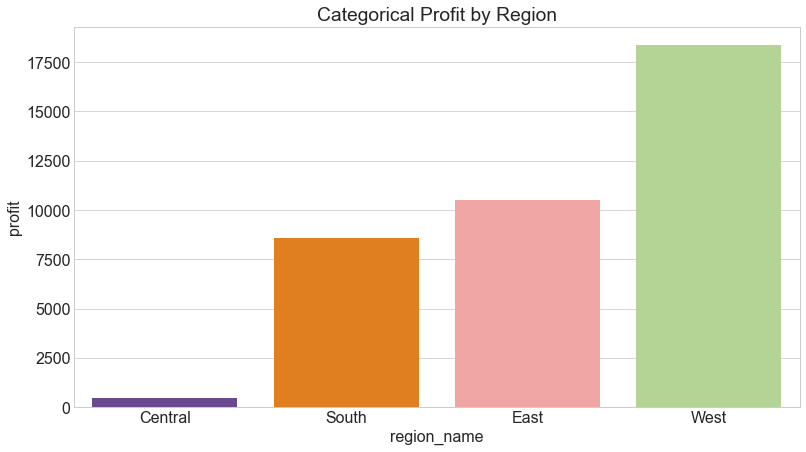

In [43]:
sns.barplot( data = df, x = 'region_name', y = 'profit', ci = None, estimator = np.sum, palette = 'Paired_r')
plt.title('Categorical Profit by Region')
None

# Conclusion
### Summary
### Project Goals were:
### - Deliver product analysis and recommendations

# Recommendations 
#### - Highest sales volume by category is the Office Supplies Category
    - Focus our efforts on the Arts and Fasteners Class of Office Supplies
    - The Supplies Class has not shown to be profitable over the last 4 years on average
#### - Most profitable category is the Technology Category
    - Most profitable brands on average are Ativa, Canon, and Konftel
#### - On average the Furniture category has not shown a positive profit over the last 4 years

## With more time we would like to further explore product sales volume and profit by region 